In [13]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

In [3]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

DATA_DIR = 'packages/ml_model/ml_model/datasets/'

Exploring the data files

In [11]:
train_targets_ns = pd.read_csv(os.path.join(DATA_DIR, 'train_targets_nonscored.csv'))
train_targets_s = pd.read_csv(os.path.join(DATA_DIR, 'train_targets_scored.csv'))
train_targets_ns.head()

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
print(train_targets_s.shape)
train_targets_s.head()

(23814, 207)


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhib

In [5]:
label_positive = (train_targets_s.set_index('sig_id') == 1).sum(axis=1)
label_positive[label_positive >= 1].value_counts()

1    12532
2     1538
3      303
4       55
5       13
7        6
dtype: int64

In [6]:
train_targets_s.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,...,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,...,0.015871,0.032384,0.044851,0.114429,0.055283,0.015871,0.084190,0.033025,0.040436,0.035472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


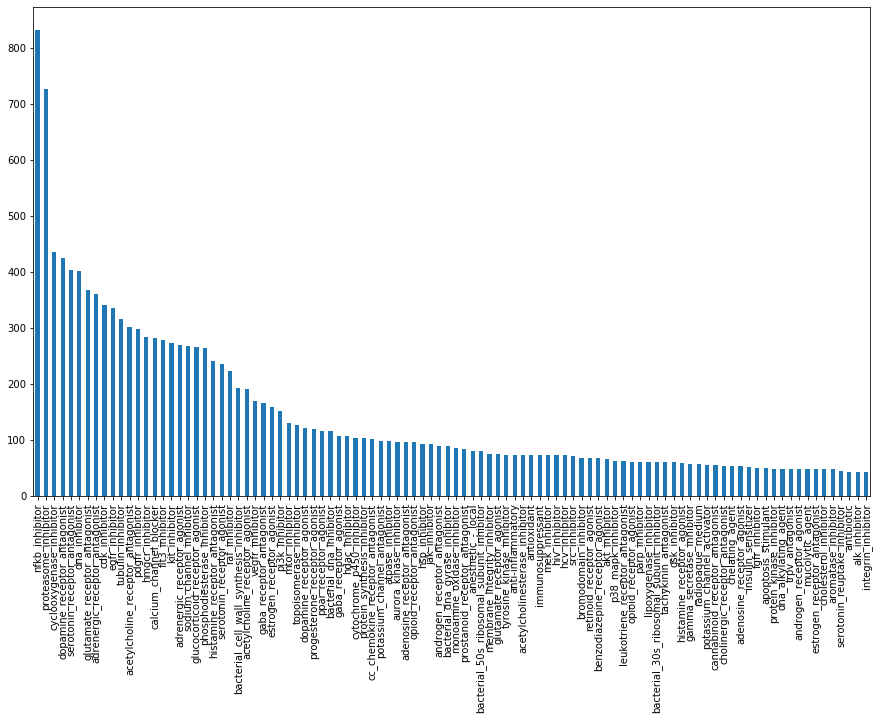

In [37]:
#targets_sum = train_targets_s.sum(axis=0).drop('sig_id').sort_values(ascending=False)
targets_sum.iloc[:100].plot.bar(figsize=(15,9))

We won't deal with the non scored targets for the moment, the scored will be our final prediction. We can see that this is a multilabel classification problem but not very multilabel, maximum is 7 labels

In [10]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train_features.csv'))
print(train.shape)
train.head()

(23814, 876)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [9]:
na_train = train.isna().sum()
na_train[na_train > 0]

Series([], dtype: int64)

There are 23814 samples, 875 features and 206 different classes to predict. Not any null values

There are 2 categorical variables (cp_type, cp_dose), one int (cp_time) and the rest are float

In [10]:
print(train.cp_type.value_counts())
print(train.cp_dose.value_counts())

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64
D1    12147
D2    11667
Name: cp_dose, dtype: int64


In [9]:
train['cp_time'] = train['cp_time'].map({24: 1, 48:2, 72:3})
train.cp_time.value_counts()

2    8250
3    7792
1    7772
Name: cp_time, dtype: int64

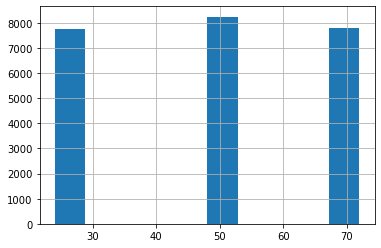

In [11]:
train.cp_time.hist()

Interesting, there are 3 main clusters for cp_time,maybe come back to it later

In [12]:
train.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


All variables are pretty much on the same scale

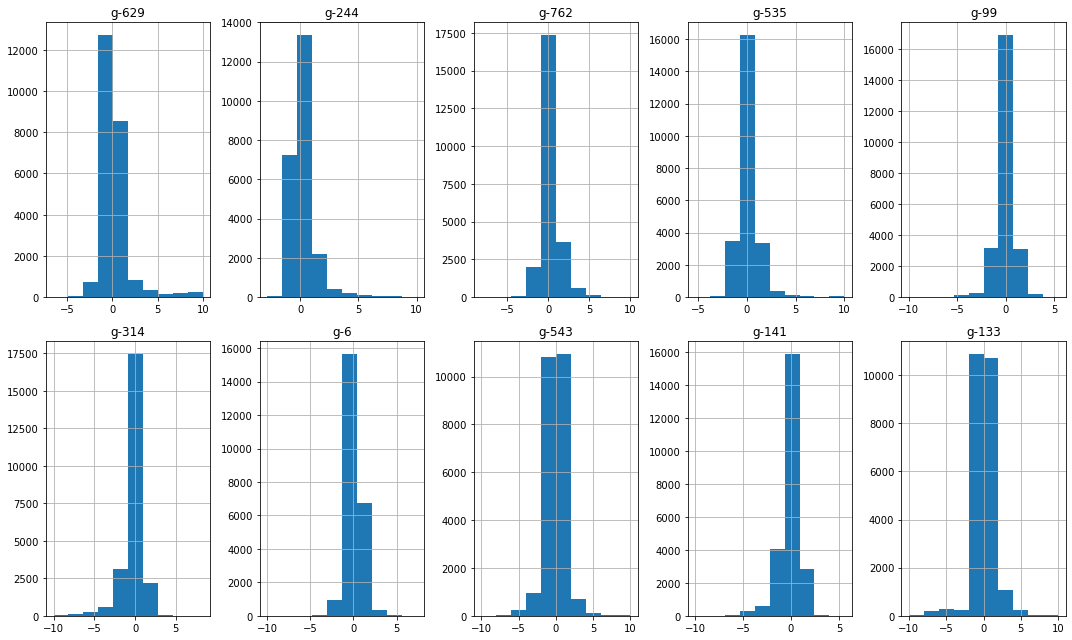

In [13]:
random_feats = random.sample(list(train.columns), 10)
fig, ax = plt.subplots(2,5,figsize=(15,9))
for i, feat in enumerate(random_feats):
    axis = ax[i//5][i%5]
    train[feat].hist(ax=axis)
    axis.set_title(feat)
plt.tight_layout()

Let's run a basic model and see what we get

In [20]:
def create_datasets(features, targets):
    feature_names = list(features.columns)
    target_names = targets.columns
    merged = features.merge(targets, on='sig_id')
    merged = merged[merged.cp_type != 'ctl_vehicle']
    merged = merged.drop('cp_type', axis=1).reset_index(drop=True)
    feature_names.remove('cp_type')
    features = merged[feature_names].drop('sig_id', axis=1)
    targets = merged[target_names].drop('sig_id', axis=1)
    return features, targets


def stratified_train_test_split(X, y):

    msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

    for train_index, test_index in msss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

    return X_train, X_test, y_train, y_test


def basic_preprocessing(X):

    X = pd.get_dummies(X, columns=['cp_dose'], drop_first=True)
    X['cp_time'] = X['cp_time'].map({24: 1, 48: 2, 72: 3})
    return X

feats, targets = create_datasets(train, train_targets_s)
feats = basic_preprocessing(feats)
X_train, X_test, y_train, y_test = stratified_train_test_split(feats, targets)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:67: FutureWarning: Pass test_size=0.2, train_size=None, random_state=42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17558, 874), (17558, 206), (4390, 874), (4390, 206))

In [6]:
corr_mat = train.drop('sig_id', axis=1).corr()
corr_mat

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,cp_type_trt_cp,cp_dose_D2
cp_time,1.000000,0.007610,0.043335,-0.162238,-0.031226,0.027241,-0.081324,-0.030058,0.003499,-0.024291,...,-0.079995,-0.032101,-0.064898,-0.112583,-0.067116,-0.067969,-0.088916,-0.075736,-0.000857,-0.001122
g-0,0.007610,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,...,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238,0.072139,-0.046947
g-1,0.043335,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,...,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308,0.066868,0.101326
g-2,-0.162238,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,...,-0.166786,-0.190383,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124,0.053437,-0.097255
g-3,-0.031226,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,...,-0.089801,-0.089818,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579,-0.002551,0.020745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c-97,-0.067969,-0.622840,-0.008487,-0.178812,-0.049951,-0.394904,0.193907,-0.095448,0.543828,0.602902,...,0.836722,0.840606,0.862876,0.811155,0.863061,1.000000,0.801809,0.775300,-0.092418,0.024246
c-98,-0.088916,-0.640484,-0.002824,-0.170152,-0.079855,-0.366693,0.179097,-0.084408,0.529412,0.596262,...,0.802289,0.811567,0.824202,0.787529,0.819600,0.801809,1.000000,0.755991,-0.120323,0.031905
c-99,-0.075736,-0.609238,-0.002308,-0.172124,-0.037579,-0.390581,0.192385,-0.079813,0.489600,0.568512,...,0.767997,0.799651,0.827228,0.758110,0.789649,0.775300,0.755991,1.000000,-0.117060,0.026250
cp_type_trt_cp,-0.000857,0.072139,0.066868,0.053437,-0.002551,0.091805,-0.013221,-0.092641,-0.005120,-0.097569,...,-0.076649,-0.107095,-0.104947,-0.098305,-0.087668,-0.092418,-0.120323,-0.117060,1.000000,-0.000252


In [27]:
corr_pairs = corr_mat.where((np.abs(corr_mat) > 0.8) & (np.abs(corr_mat) != 1)).stack()
corr_pairs = pd.DataFrame(corr_pairs).reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']
corr_pairs = corr_pairs.drop('corr', axis=1)
corr_pairs

,feature1,feature2
0,g-37,g-50
1,g-37,g-72
2,g-37,g-489
3,g-37,g-672
4,g-38,g-744
...,...,...
8865,c-99,c-72
8866,c-99,c-73
8867,c-99,c-75
8868,c-99,c-80


In [28]:
grouped_feature_ls = []
correlated_groups = []

for feature in corr_pairs.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corr_pairs[corr_pairs.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)
        
correlated_groups

[  feature1 feature2
 0     g-37     g-50
 1     g-37     g-72
 2     g-37    g-489
 3     g-37    g-672,
    feature1 feature2
 4      g-38    g-744
 5      g-38      c-2
 6      g-38      c-4
 7      g-38      c-5
 8      g-38      c-6
 9      g-38      c-8
 10     g-38     c-10
 11     g-38     c-11
 12     g-38     c-13
 13     g-38     c-15
 14     g-38     c-17
 15     g-38     c-18
 16     g-38     c-21
 17     g-38     c-24
 18     g-38     c-25
 19     g-38     c-26
 20     g-38     c-28
 21     g-38     c-31
 22     g-38     c-33
 23     g-38     c-34
 24     g-38     c-36
 25     g-38     c-38
 26     g-38     c-40
 27     g-38     c-41
 28     g-38     c-42
 29     g-38     c-43
 30     g-38     c-45
 31     g-38     c-47
 32     g-38     c-48
 33     g-38     c-49
 34     g-38     c-51
 35     g-38     c-52
 36     g-38     c-54
 37     g-38     c-55
 38     g-38     c-57
 39     g-38     c-59
 40     g-38     c-60
 41     g-38     c-62
 42     g-38     c-63
 43     g-38  

In [29]:
len(correlated_groups)

23

In [31]:
sum_=0
for group in correlated_groups:
    sum_ = sum_+len(group)
    print(len(group))
print(sum_)

4
51
2
9
1
32
7
44
3
1
1
51
3
11
80
72
49
64
23
71
8
63
34
684
